# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [2]:
# %pip install --upgrade plotly

### Import Statements

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [5]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
df_data.shape

(962, 16)

In [7]:
df_data.info

<bound method DataFrame.info of      year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition 

In [8]:
print(f'The year column data has a type of {type(df_data.year[0])}')

The year column data has a type of <class 'numpy.int64'>


In [9]:
print(f'The category column data has a type of {type(df_data.category[0])}')

The category column data has a type of <class 'str'>


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [10]:
len(df_data[df_data.duplicated() == True])

0

### Check for NaN Values

In [11]:
type(df_data.isna().values.any())

numpy.bool_

In [12]:
df_data.isna().values.any()

True

> Get the number of NaN values per column

In [13]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [14]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
print(type(df_data.birth_date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### Add a Column with the Prize Share as a Percentage

> Perform trial calculation on a random element.

In [15]:
share_pct_numerator = int(df_data.prize_share[959][:1])
share_pct_denominator = int(df_data.prize_share[959][-1:])
share_pct = share_pct_numerator / share_pct_denominator
share_pct

0.25

In [16]:
type(share_pct)

float

> Perform calculation on entire column using comprehension and insert the new column into the dataframe.

In [17]:
share_pct = [int(item[:1])/int(item[-1:]) for item in df_data.prize_share]
df_data.insert(loc=5, column='share_pct', value=share_pct)
df_data.head()

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,1.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,1.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,1.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [18]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   share_pct              962 non-null    float64       
 6   laureate_type          962 non-null    object        
 7   full_name              962 non-null    object        
 8   birth_date             934 non-null    datetime64[ns]
 9   birth_city             931 non-null    object        
 10  birth_country          934 non-null    object        
 11  birth_country_current  934 non-null    object        
 12  sex                    934 non-null    object        
 13  organ

Three questions I would like the data to answer:


1.   How many Noebel prizes were won by organisations in percentage terms?
2.   Which country is home to the most Nobel laureates?
3.   Which category has received the most prizes?



# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [19]:
print(df_data.sex.value_counts())
df_data.shape

Male      876
Female     58
Name: sex, dtype: int64


(962, 17)

In [20]:
# df_m = df_data[df_data.sex == 'Male']
# df_f = df_data[df_data.sex == 'Female']
# print(len(df_m))
# print(len(df_f))

gender = df_data.sex.value_counts()
print(gender)
fig = px.pie(labels=gender.index, values=gender.values, names=gender.index, hole=0.7,
             title="Percentage of Male v. Female Nobel Laureates")
fig.show()

Male      876
Female     58
Name: sex, dtype: int64


In [21]:
df = px.data.tips()

gender = df.sex.value_counts()
print(gender)

print(type(df))
print(df.head())
fig = px.pie(labels=gender.index, values=gender.values, names=gender.index, hole=0.7,
             title='Male v Female Tippers')
fig.show()

Male      157
Female     87
Name: sex, dtype: int64
<class 'pandas.core.frame.DataFrame'>
   total_bill  tip     sex smoker  day    time  size
0       16.99 1.01  Female     No  Sun  Dinner     2
1       10.34 1.66    Male     No  Sun  Dinner     3
2       21.01 3.50    Male     No  Sun  Dinner     3
3       23.68 3.31    Male     No  Sun  Dinner     2
4       24.59 3.61  Female     No  Sun  Dinner     4


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [22]:
# Isolate the Female laureates of the dataframe
female_winners = df_data.query("sex == 'Female'").sort_values('year').head(3)
female_winners

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,0.25,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,1.00,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,1.00,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE


In [23]:
print(f"The first three female Nobel Laureates are: \n{female_winners.full_name.values}")

The first three female Nobel Laureates are: 
['Marie Curie, née Sklodowska'
 'Baroness Bertha Sophie Felicita von Suttner, née Countess Kinsky von Chinic und Tettau'
 'Selma Ottilia Lovisa Lagerlöf']


In [24]:
print(f"The first three female prizes are for: \n{female_winners.category.values}")

The first three female prizes are for: 
['Physics' 'Peace' 'Literature']


In [25]:
print(f"The birth countries of the first three female Nobel Laureates are: \n{female_winners.birth_country.values}")

The birth countries of the first three female Nobel Laureates are: 
['Russian Empire (Poland)' 'Austrian Empire (Czech Republic)' 'Sweden']


In [26]:
print(f"The first three female Nobel Laureates were members of an organisation: {female_winners.organization_name.values == 'NaN'}")

The first three female Nobel Laureates were members of an organisation: [False False False]


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [27]:
repeat_winners = df_data[df_data.full_name.duplicated(keep=False)]
repeat_winners.query("laureate_type == 'Individual'")

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,0.25,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,1.00,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,1.00,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,0.33,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,1.00,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,1.00,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA
424,1972,Physics,The Nobel Prize in Physics 1972,"""for their jointly developed theory of superco...",1/3,0.33,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA
505,1980,Chemistry,The Nobel Prize in Chemistry 1980,"""for their contributions concerning the determ...",1/4,0.25,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,GBR


In [28]:
repeat_winners.query("laureate_type == 'Organization'")

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,1.00,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,1.00,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,1.00,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,0.50,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523,1981,Peace,The Nobel Peace Prize 1981,NaN,1/1,1.00,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [29]:
f"There are {len(df_data.category.unique())} unique prize categories"

'There are 6 unique prize categories'

In [30]:
prizes_per_cat = df_data.category.value_counts()
fig = px.bar(prizes_per_cat, title='Nobel Prizes Awarded by Category', 
             color=prizes_per_cat.values, color_continuous_scale='Aggrnyl')
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Prizes Awarded',
                  coloraxis_showscale=False)
fig.show()

In [31]:
print(f"Currently the most prizes have been awarded in the {prizes_per_cat[prizes_per_cat.values == prizes_per_cat.values.max()].index[0]} category where {prizes_per_cat.values.max()} prizes have been received.")


Currently the most prizes have been awarded in the Medicine category where 222 prizes have been received.


In [32]:
print(f"Currently the fewest prizes have been awarded in the {prizes_per_cat[prizes_per_cat.values == prizes_per_cat.values.min()].index[0]} category where {prizes_per_cat.values.min()} prizes have been received.")


Currently the fewest prizes have been awarded in the Economics category where 86 prizes have been received.


**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [33]:
print(f"The first Nobel Prize for Economics was awarded in {df_data[df_data.category == 'Economics'].year.min()}")

The first Nobel Prize for Economics was awarded in 1969


In [34]:
economics_prize_winners = df_data[df_data.category == 'Economics']
winner_names = economics_prize_winners.full_name[economics_prize_winners.year == economics_prize_winners.year.min()].values

In [35]:
print(f"The winners of first Nobel Prize for Economics are {winner_names[0]} and {winner_names[1]}.")

The winners of first Nobel Prize for Economics are Jan Tinbergen and Ragnar Frisch.


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [36]:
prizes_per_cat = df_data.category.value_counts()
fig = px.bar(prizes_per_cat, title='Nobel Prizes Awarded by Category', 
             color=prizes_per_cat.values, color_continuous_scale='Aggrnyl')
fig.update_layout(xaxis_title='Category',
                  yaxis_title='Prizes Awarded',
                  coloraxis_showscale=False)
fig.show()

In [37]:
cat_by_gender = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
cat_by_gender.sort_values('prize', ascending=False, inplace=True)
cat_by_gender.head()

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90


In [38]:
fig1 = px.bar(cat_by_gender,
              x='category',
              y='prize',
              color='sex',
              title='Distribution of Nobel Prizes by Gender')
fig1.update_layout(xaxis_title='Nobel Prize Category',
                   yaxis_title='Total Prizes Won',
                   legend=dict(title='Gender',
                               yanchor='top',
                               y=0.97,
                               xanchor='right',
                               x=0.99))
fig1.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [39]:
cat_by_gender = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
cat_by_gender.sort_values('prize', ascending=False, inplace=True)
cat_by_gender.head()

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90


A dataframe is required very similar in structure to the cat_by_gender dataframe.  Instead of the category and sex columns the year will feature and the prize count can remain as is.

Using the as_index parameter in the groupby method, allows the year column to be treated independently from the index column.  This is desirable since it will be referenc-able for the chart to be created, but doing this will complicate things later so give it a value of True.

In [40]:
annual_prizes = df_data.groupby(['year'], as_index=True).agg({'prize': pd.Series.count})
annual_prizes.sort_values('year', inplace=True)
annual_prizes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 1901 to 2020
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   prize   117 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


### Course method of finding the number of prizes awarded per year
> The proposed method of finding the number of prizes awarded per year is shown below.  This method produces a series rather than a dataframe and therefore is less useful imho.

In [41]:
prizes_per_year = df_data.groupby(by='year').count().prize
type(prizes_per_year)

pandas.core.series.Series

### Viewing the annual_prizes dataframe

In [42]:
annual_prizes

,prize
year,
1901,6
1902,7
1903,7
1904,6
1905,5
...,...
2016,11
2017,12
2018,13


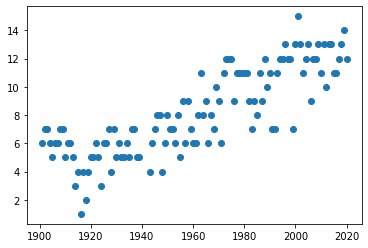

In [43]:
plt.scatter(annual_prizes.index, annual_prizes.prize)

Now that the annual_prizes dataframe exists a five-year rolling averaged can be calculated and reviewed.

In [44]:
rolling_aves = annual_prizes.rolling(window=5).mean()
annual_prizes.insert(1, 'ave_prizes', rolling_aves)
print(rolling_aves)
type(rolling_aves)

      prize
year       
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   6.20
...     ...
2016  11.60
2017  12.00
2018  12.00
2019  12.20
2020  12.40

[117 rows x 1 columns]


pandas.core.frame.DataFrame

In [45]:
print(annual_prizes)
type(annual_prizes)

      prize  ave_prizes
year                   
1901      6         NaN
1902      7         NaN
1903      7         NaN
1904      6         NaN
1905      5        6.20
...     ...         ...
2016     11       11.60
2017     12       12.00
2018     13       12.00
2019     14       12.20
2020     12       12.40

[117 rows x 2 columns]


pandas.core.frame.DataFrame

Superimposing the rolling average with x-axis tick marks for each five-year interval is straight forward now.

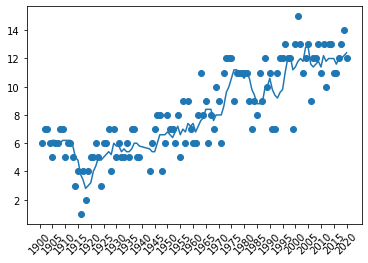

In [46]:
plt.xticks(np.arange(1900, 2025, step=5))
plt.xticks(rotation=45)
plt.scatter(x=annual_prizes.index, y=annual_prizes.prize)
plt.plot(annual_prizes.index, annual_prizes.ave_prizes)

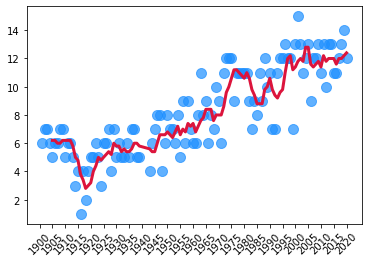

In [47]:
plt.xticks(np.arange(1900, 2025, step=5))
plt.xticks(rotation=45)
plt.scatter(x=annual_prizes.index, y=annual_prizes.prize, c='dodgerblue', alpha=0.7, s=100)
plt.plot(annual_prizes.index, annual_prizes.ave_prizes, c='crimson', linewidth=3)

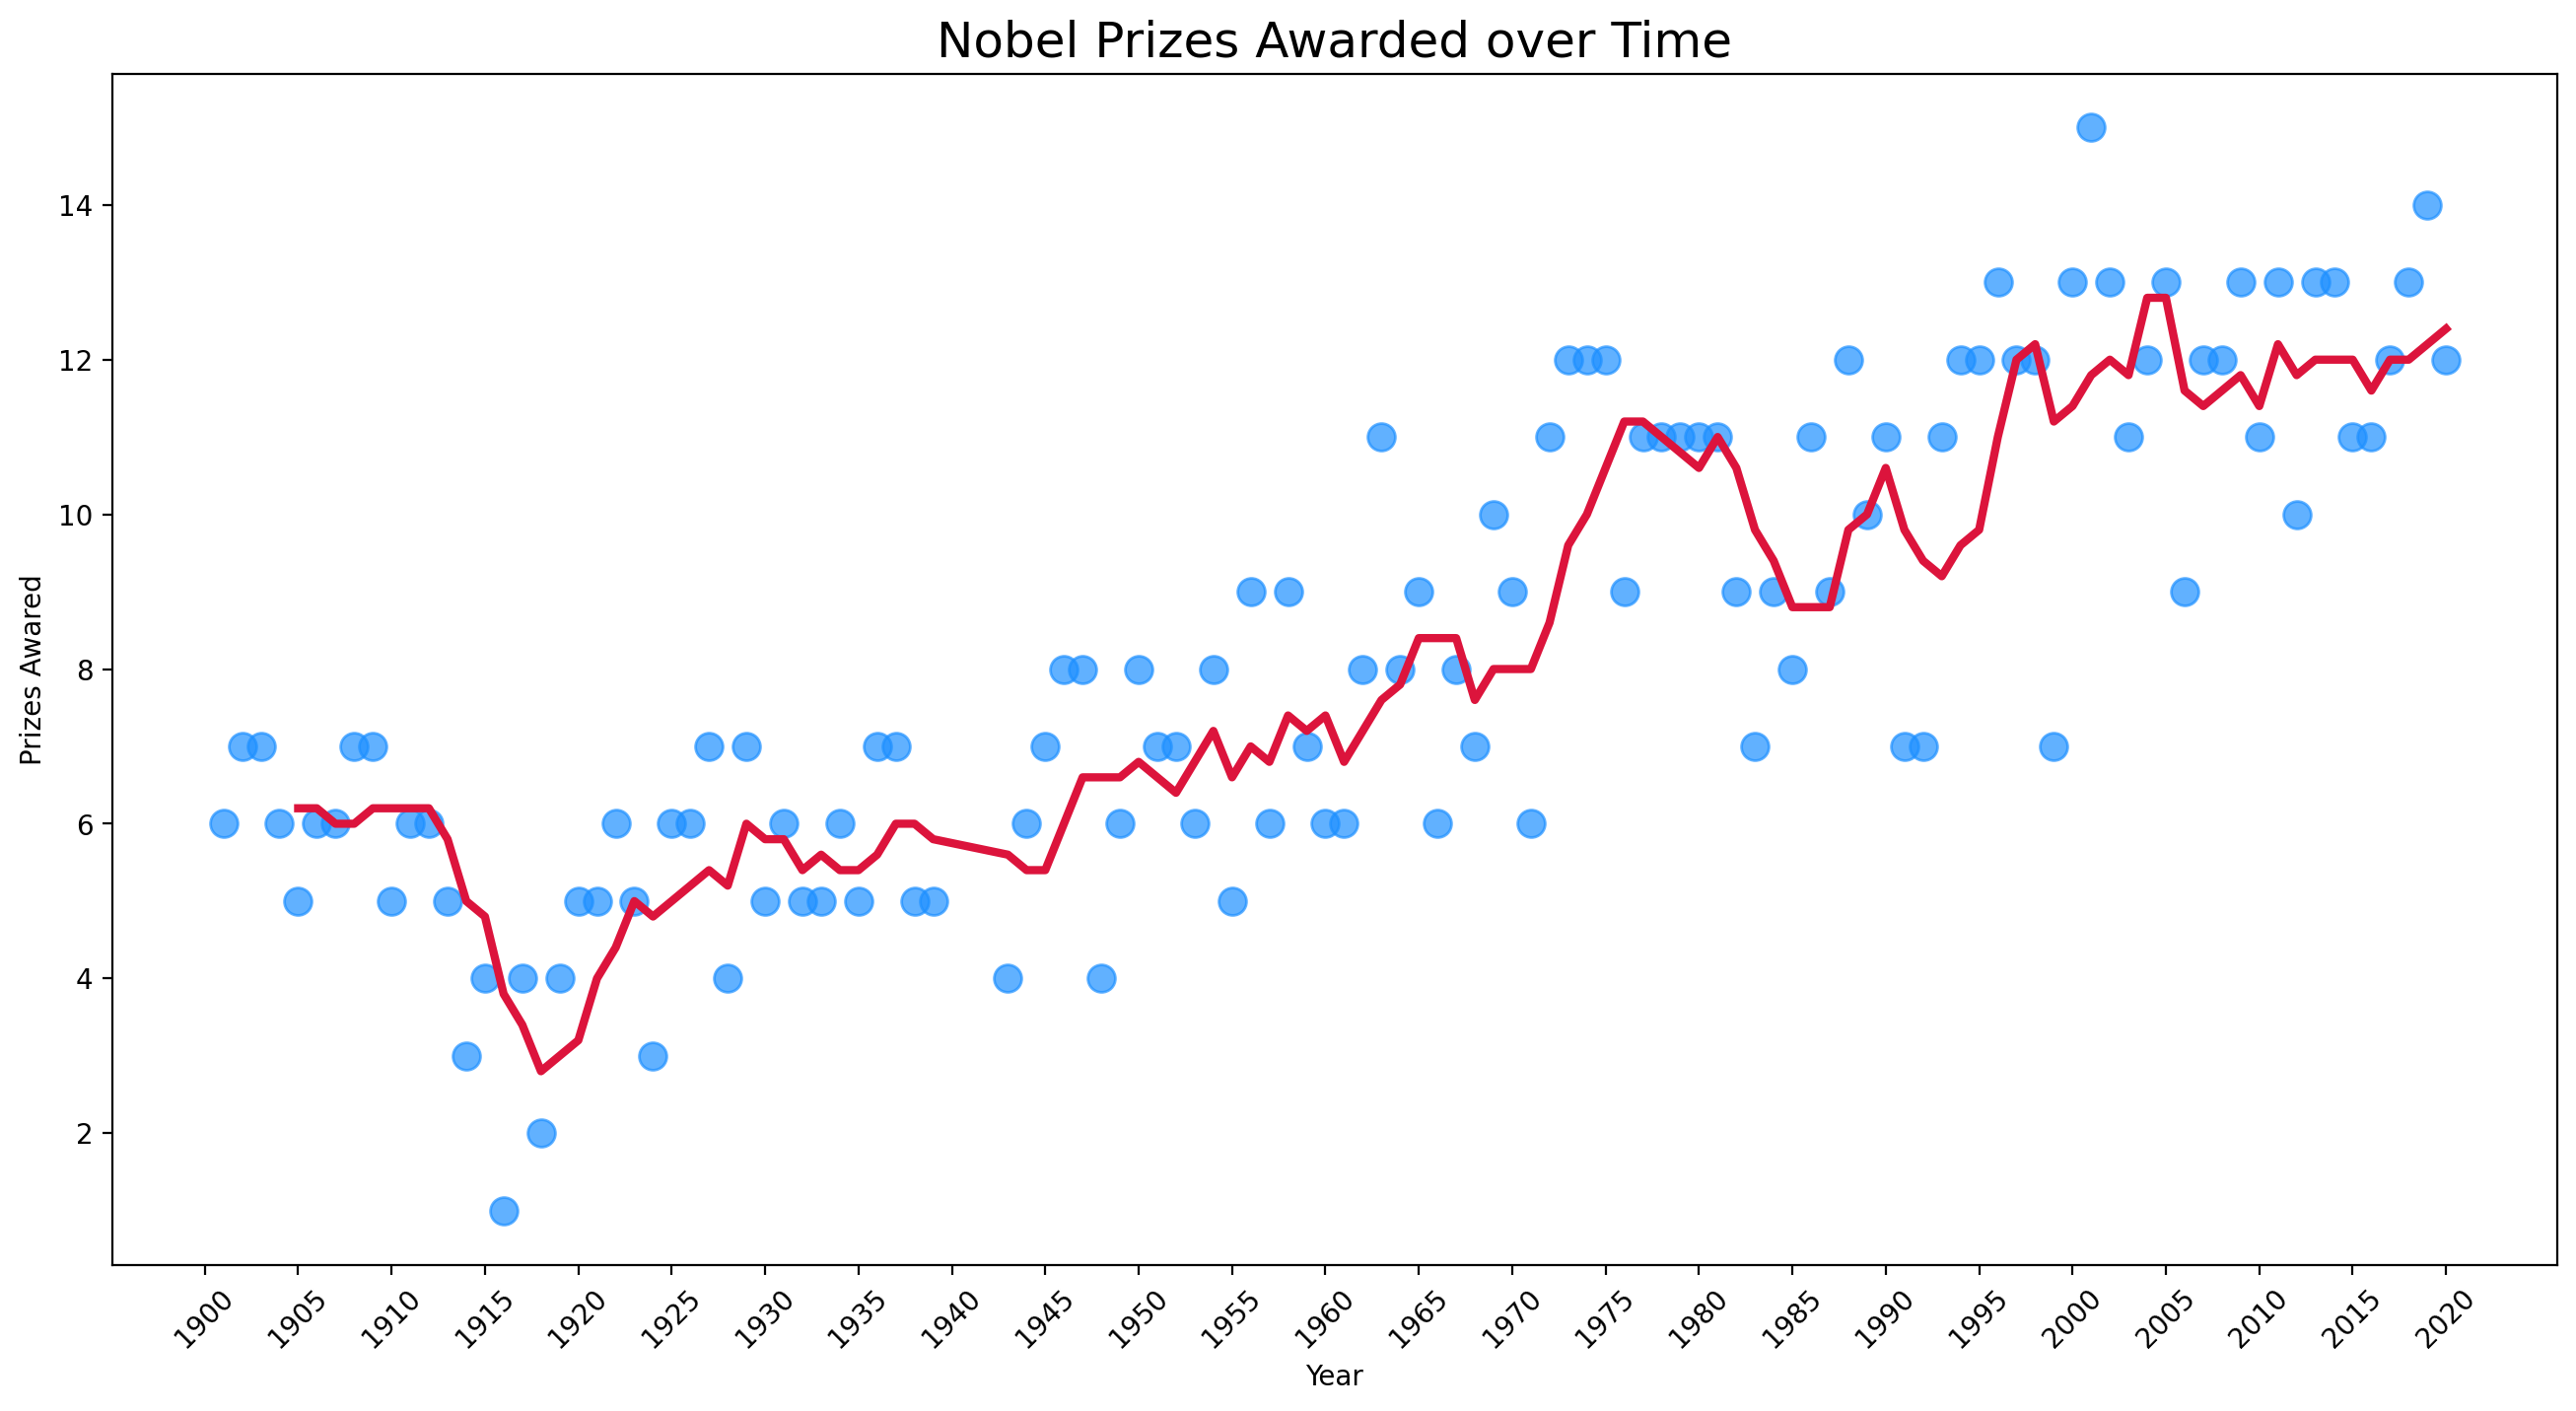

In [48]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Nobel Prizes Awarded over Time", fontsize=18)
plt.xlabel("Year")
plt.ylabel("Prizes Awared")
plt.xticks(np.arange(1900, 2025, step=5))
plt.xticks(rotation=45)
plt.scatter(x=annual_prizes.index, y=annual_prizes.prize, color='dodgerblue', alpha=0.7, s=100)
plt.plot(annual_prizes.index, annual_prizes.ave_prizes, color='crimson', linewidth=3)

Reviewing the data it can be deduced that the first World War certainly had an impact on the number of prizes awarded.  Also the Second World War between 1939 and 1945 shows a depressed number of awards.  Wars are bad for innovation and creativity is a conclusion that can be drawn here, especially due to the numbers of lives that the wars claimed not to mention the destruction.

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

### Review the cat_by_gender dataframe

In [49]:
cat_by_gender = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
# cat_by_gender.sort_values('prize', ascending=False, inplace=True)
cat_by_gender[sorted(cat_by_gender)]
cat_by_gender

,category,sex,prize
0,Chemistry,Female,7
1,Chemistry,Male,179
2,Economics,Female,2
3,Economics,Male,84
4,Literature,Female,16
5,Literature,Male,101
6,Medicine,Female,12
7,Medicine,Male,210
8,Peace,Female,17
9,Peace,Male,90


### Calculate average prize share by year

In [50]:
ave_prize_share_by_year = df_data.groupby(['year'], as_index=True).agg({'share_pct': pd.Series.mean})
ave_prize_share_by_year.sort_values('year')
ave_prize_share_by_year.head()

,share_pct
year,
1901,0.83
1902,0.71
1903,0.71
1904,0.83
1905,1.00


### View underlying data supporting the calculated ave.

In [51]:
df_data[df_data.year == 1905]

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
26,1905,Chemistry,The Nobel Prize in Chemistry 1905,"""in recognition of his services in the advance...",1/1,1.00,Individual,Johann Friedrich Wilhelm Adolf von Baeyer,1835-10-31,Berlin,Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU
27,1905,Literature,The Nobel Prize in Literature 1905,"""because of his outstanding merits as an epic ...",1/1,1.00,Individual,Henryk Sienkiewicz,1846-05-05,Wola Okrzejska,Poland,Poland,Male,NaN,NaN,NaN,POL
28,1905,Medicine,The Nobel Prize in Physiology or Medicine 1905,"""for his investigations and discoveries in rel...",1/1,1.00,Individual,Robert Koch,1843-12-11,Clausthal (Clausthal-Zellerfeld),Germany,Germany,Male,Institute for Infectious Diseases,Berlin,Germany,DEU
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,1.00,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE
30,1905,Physics,The Nobel Prize in Physics 1905,"""for his work on cathode rays""",1/1,1.00,Individual,Philipp Eduard Anton von Lenard,1862-06-07,Pressburg (Bratislava),Hungary (Slovakia),Slovakia,Male,Kiel University,Kiel,Germany,SVK


### Calculate 5-year rolling average of percent share.

In [52]:
rolling_shr = ave_prize_share_by_year.rolling(window=5).mean()
ave_prize_share_by_year.insert(1, 'rolling_ave', rolling_shr)
print(rolling_shr)
type(rolling_shr)

      share_pct
year           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905       0.82
...         ...
2016       0.52
2017       0.50
2018       0.50
2019       0.50
2020       0.49

[117 rows x 1 columns]


pandas.core.frame.DataFrame

In [53]:
print(ave_prize_share_by_year)
type(ave_prize_share_by_year)

      share_pct  rolling_ave
year                        
1901       0.83          NaN
1902       0.71          NaN
1903       0.71          NaN
1904       0.83          NaN
1905       1.00         0.82
...         ...          ...
2016       0.55         0.52
2017       0.50         0.50
2018       0.46         0.50
2019       0.43         0.50
2020       0.50         0.49

[117 rows x 2 columns]


pandas.core.frame.DataFrame

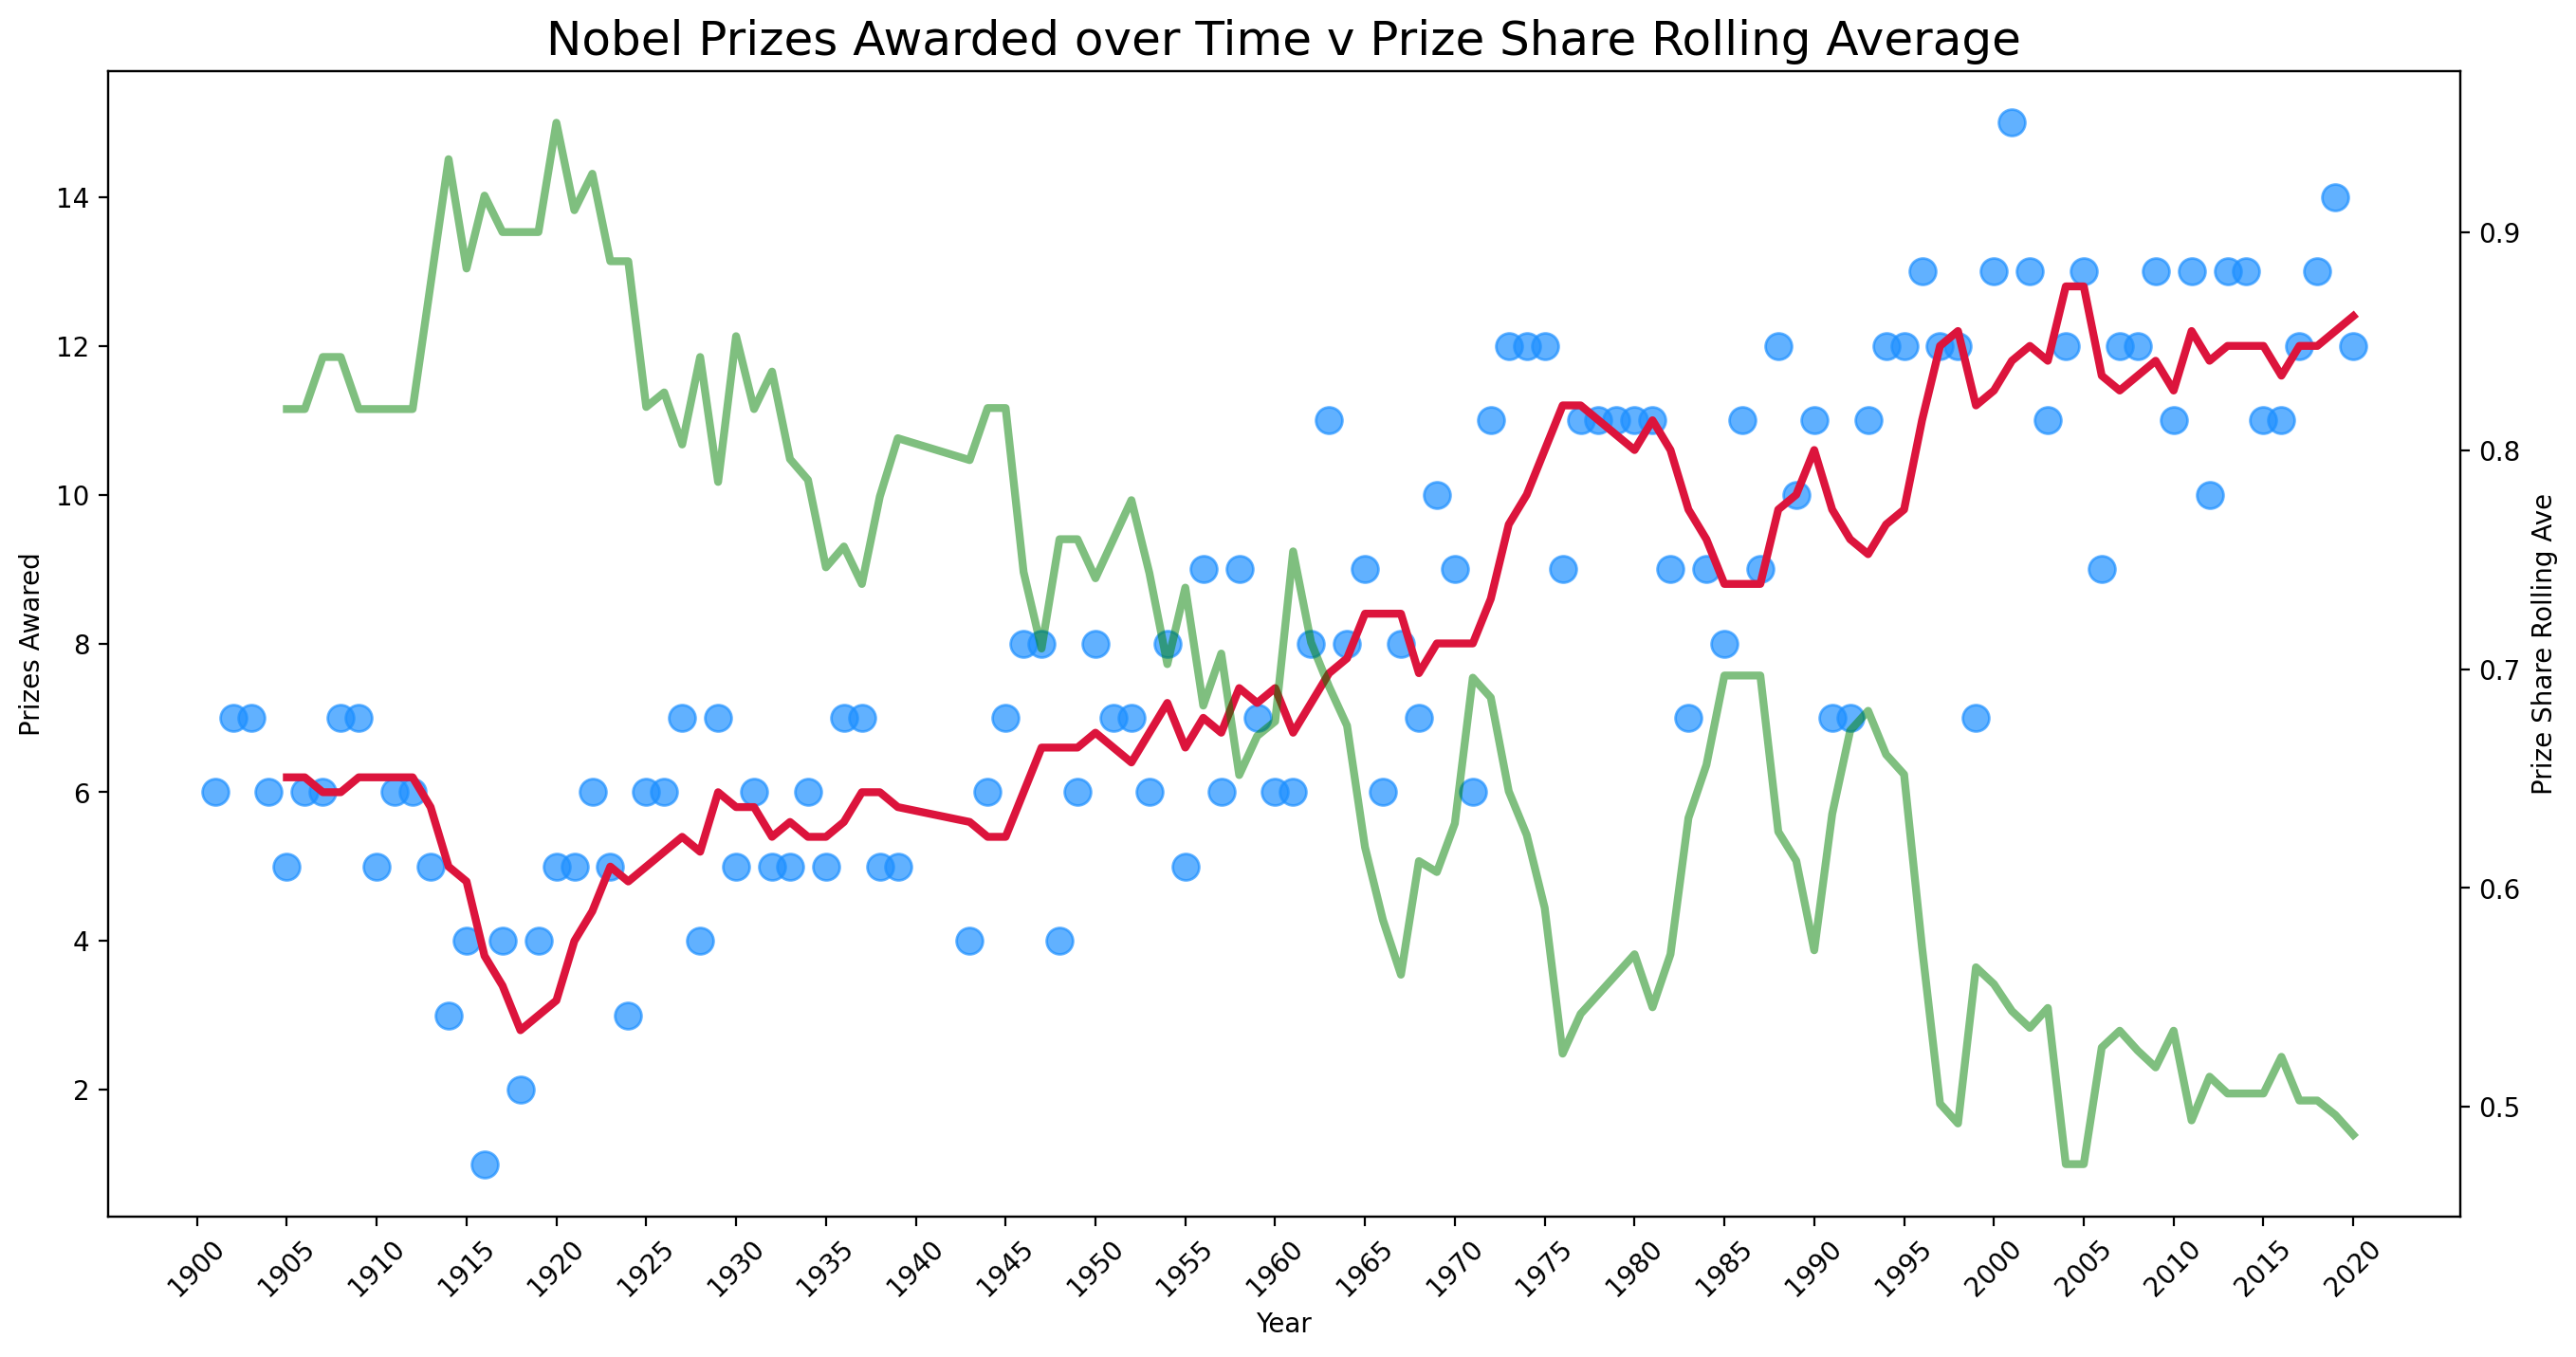

In [54]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Nobel Prizes Awarded over Time v Prize Share Rolling Average", fontsize=18)
plt.xticks(np.arange(1900, 2025, step=5))
plt.xticks(rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel('Year')
ax1.set_ylabel('Prizes Awared')
ax2.set_ylabel('Prize Share Rolling Ave')

ax1.scatter(x=annual_prizes.index, y=annual_prizes.prize, color='dodgerblue', alpha=0.7, s=100)
ax1.plot(annual_prizes.index, annual_prizes.ave_prizes, color='crimson', linewidth=3)

ax2.plot(ave_prize_share_by_year.index, ave_prize_share_by_year.rolling_ave, c='g', alpha=0.5, linewidth=3)

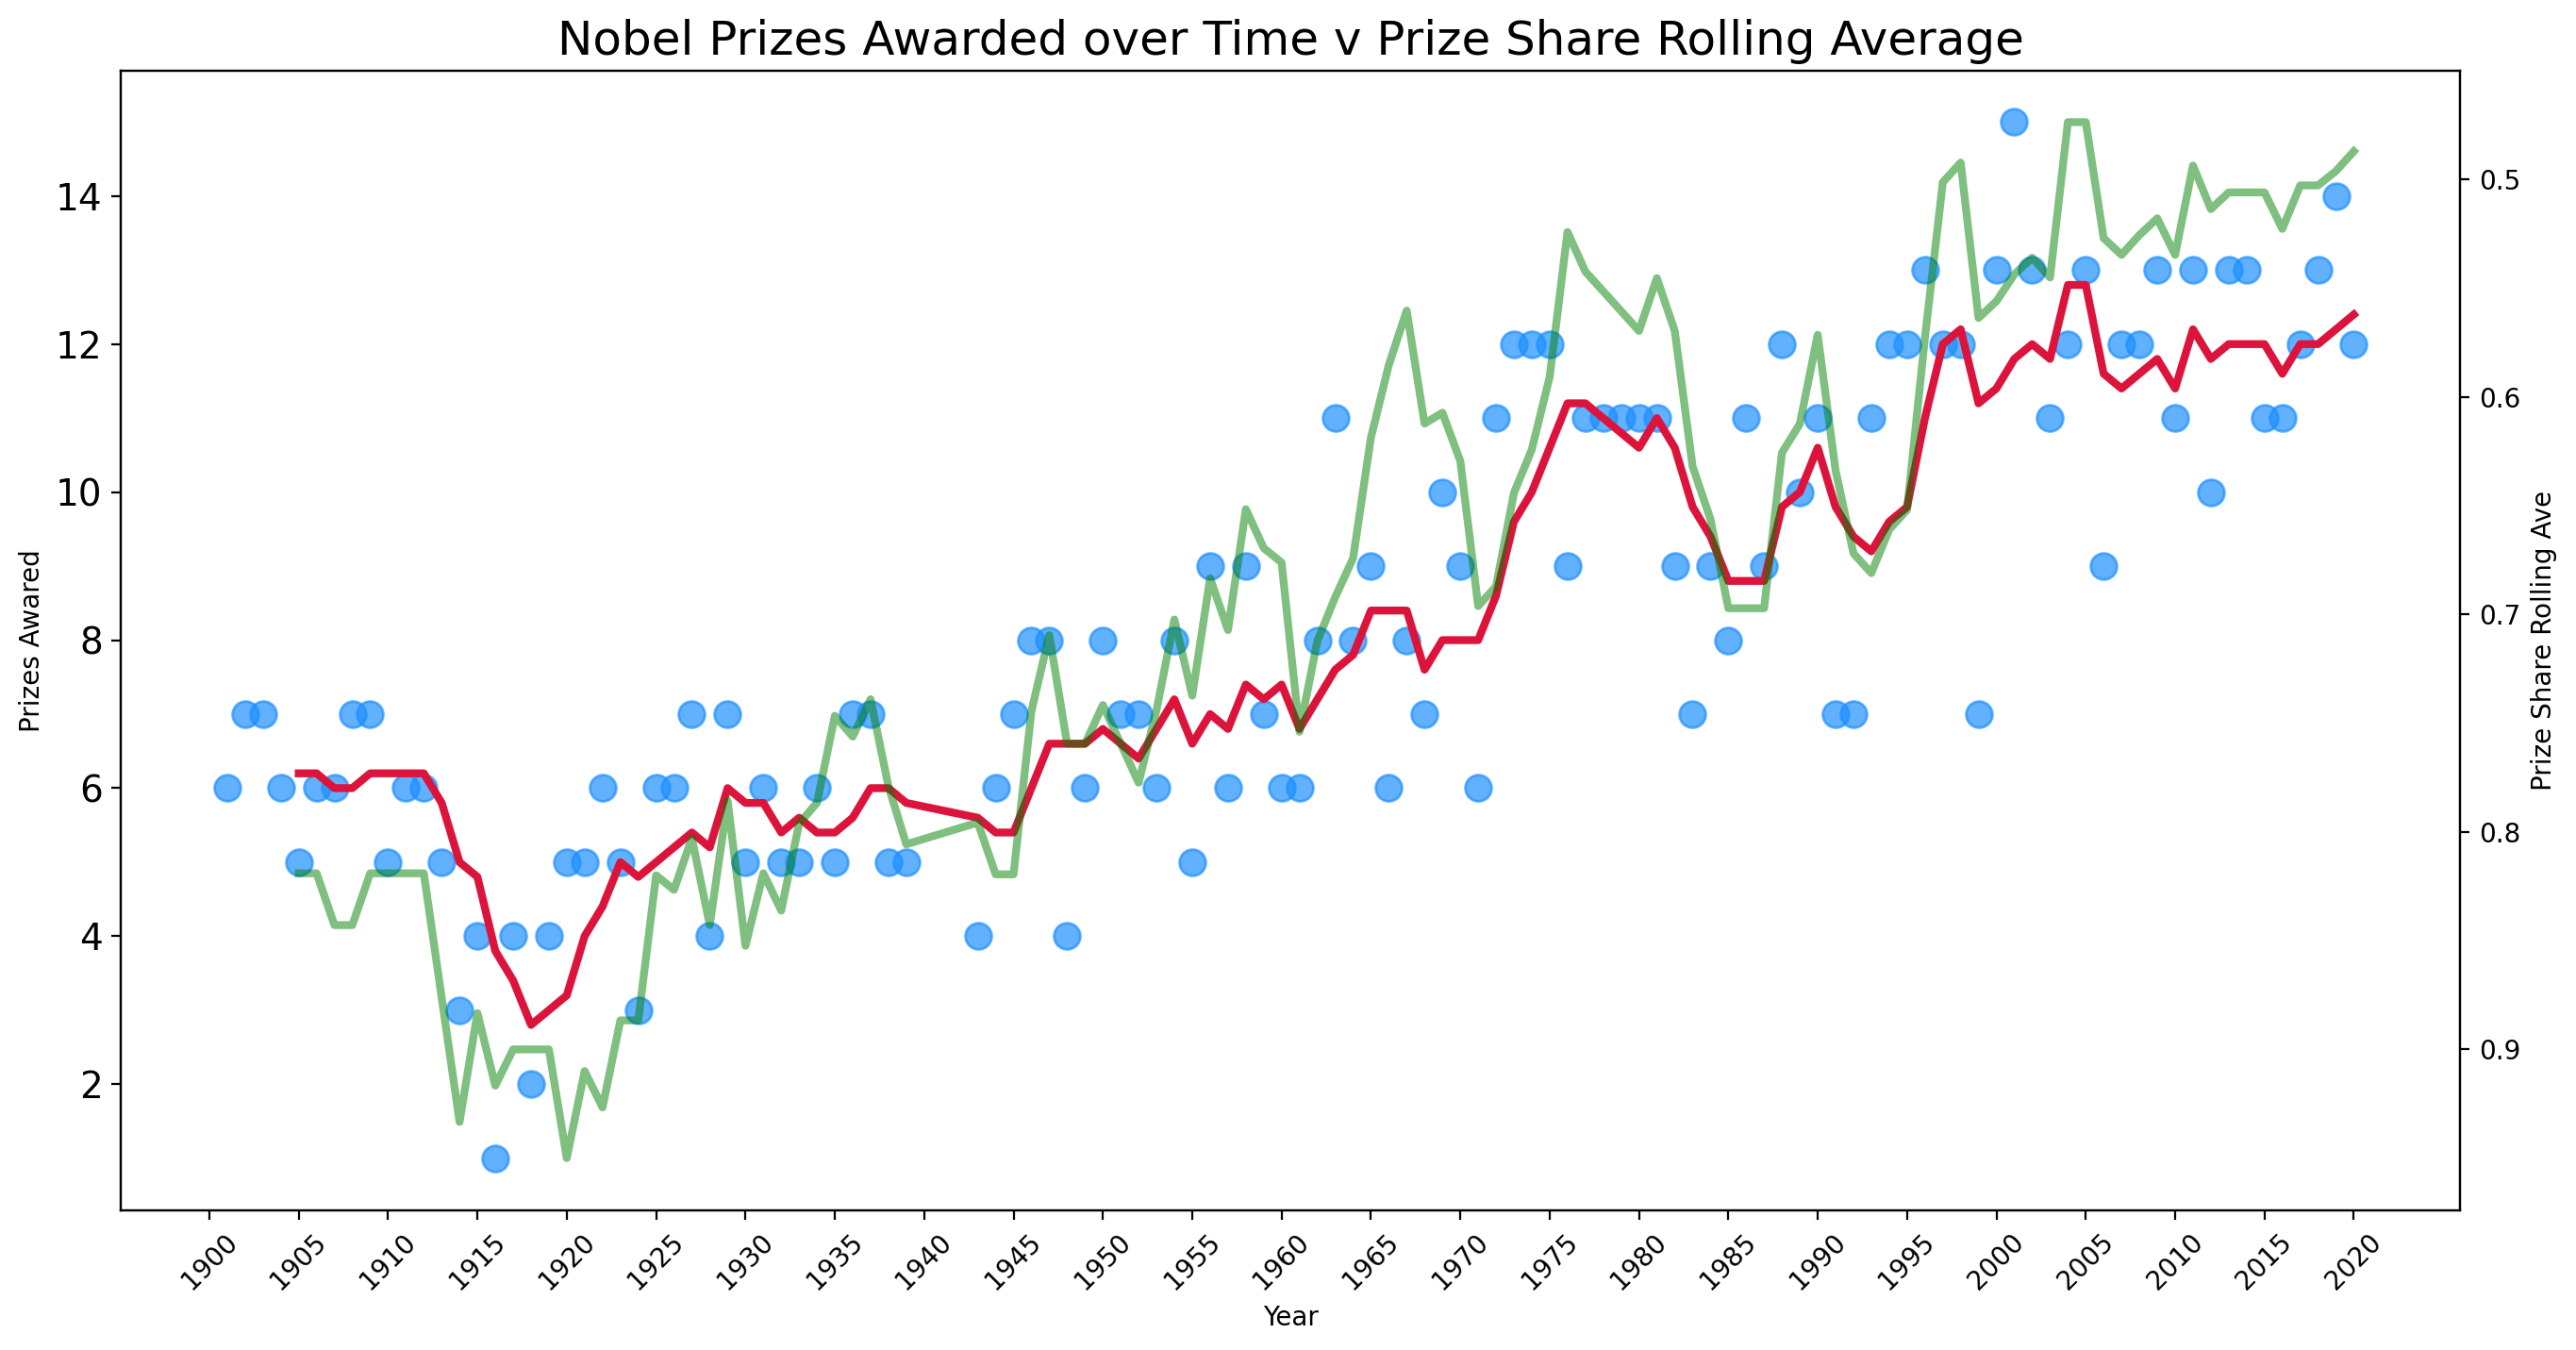

In [55]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Nobel Prizes Awarded over Time v Prize Share Rolling Average", fontsize=18)
plt.xticks(np.arange(1900, 2025, step=5))
plt.xticks(rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.invert_yaxis()

ax1.set_xlabel('Year')
ax1.set_ylabel('Prizes Awared')
ax2.set_ylabel('Prize Share Rolling Ave')

ax1.scatter(x=annual_prizes.index, y=annual_prizes.prize, c='dodgerblue', alpha=0.7, s=100)
ax1.plot(annual_prizes.index, annual_prizes.ave_prizes, c='crimson', linewidth=3)

ax2.plot(ave_prize_share_by_year.index, ave_prize_share_by_year.rolling_ave, c='g', alpha=0.5, linewidth=3)

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

### Get the data by birth_country.

In [56]:
top20_countries = df_data.groupby(by=['birth_country'], as_index=True).agg({'prize': pd.Series.count})
top20_countries.sort_values('prize', ascending=False).head(20).describe()

,prize
count,20.00
mean,36.60
std,61.49
min,8.00
25%,10.75
50%,17.00
75%,27.50
max,281.00


In [57]:
f'{len(df_data[df_data.birth_country.isna() == True])} NaN values exist in the data.'

'28 NaN values exist in the data.'

In [58]:
f"{top20_countries.sort_values('prize', ascending=False).head(20).sum()[0]} prizes have been awarded to top 20 birth_country countries."

'732 prizes have been awarded to top 20 birth_country countries.'

### Get the data by organization_country.

In [59]:
top20_countries = df_data.groupby(by=['organization_country'], as_index=False).agg({'prize': pd.Series.count})
top20_countries.sort_values('prize', ascending=False).head(20).describe()

,prize
count,20.00
mean,35.05
std,81.83
min,1.00
25%,5.00
50%,8.50
75%,19.50
max,368.00


In [60]:
f'{len(df_data[df_data.organization_country.isna() == True])} NaN values exist in the data.'

'254 NaN values exist in the data.'

In [61]:
f"{top20_countries.sort_values('prize', ascending=False).head(20).sum()[1]} prizes have been awarded to top 20 organization_country countries."

'701 prizes have been awarded to top 20 organization_country countries.'

### Get the data by birth_country_current.

In [62]:
top_countries = df_data.groupby(by=['birth_country_current'], as_index=False).agg({'prize': pd.Series.count})
top_countries.sort_values('prize', inplace=True)
top20_countries = top_countries[-20:]

In [63]:
f'{len(df_data[df_data.birth_country_current.isna() == True])} NaN values exist in the data.'

'28 NaN values exist in the data.'

In [64]:
f"{top20_countries.sort_values('prize', ascending=False).head(20).sum()[0]} prizes have been awarded to top 20 birth_country_current countries."

'United States of AmericaUnited KingdomGermanyFranceSwedenPolandJapanRussiaCanadaSwitzerlandItalyAustriaNetherlandsChinaNorwayDenmarkAustraliaHungaryIndiaBelgium prizes have been awarded to top 20 birth_country_current countries.'

Examining the data reveals that it may be best to use birth_country_current to analyse the prizes awarded by country as there are more prizes awarded to people in conjuction with this field - 803 prizes v 732 v 701.  There are NaN values in all of the columns the most being in the organization country column.

### Using birth_country_current data for analysis

In [65]:
top20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [66]:
fig = px.bar(top20_countries, x='prize', y='birth_country_current', title='Top 20 Countries by Number of Prizes',
             orientation='h', color=top20_countries.prize, color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='Prizes Awarded',
                  yaxis_title='Country',
                  coloraxis_showscale=False)
fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [67]:
nobel_prize_winning_countries = df_data.groupby(by=['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})
nobel_prize_winning_countries.head()

,birth_country_current,ISO,prize
0,Algeria,DZA,2
1,Argentina,ARG,4
2,Australia,AUS,10
3,Austria,AUT,18
4,Azerbaijan,AZE,1


In [68]:
fig = px.choropleth(nobel_prize_winning_countries, 
                    locations='ISO', 
                    color='prize',
                    color_continuous_scale="curl")
fig.update_layout(title='Countries Awarded Nobel Prizes')
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


### Group the countries by their prize winning categories and number of instances of prizes won in those categories

In [69]:
nobel_prize_countries_cat = df_data.groupby(by=['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
nobel_prize_countries_cat.sort_values(by='prize', ascending=False, inplace=True)
nobel_prize_countries_cat

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


### Merge the nobel_prize_countries_cat dataframe with the top20_countries dataframe.

In [70]:
top20_merged_df = pd.merge(nobel_prize_countries_cat, top20_countries, on='birth_country_current')
top20_merged_df

,birth_country_current,category,prize_x,prize_y
0,United States of America,Medicine,78,281
1,United States of America,Physics,70,281
2,United States of America,Chemistry,55,281
3,United States of America,Economics,49,281
4,United States of America,Peace,19,281
...,...,...,...,...
105,India,Literature,2,9
106,India,Medicine,2,9
107,India,Chemistry,1,9
108,India,Peace,1,9


### Change column names for merged_df

In [71]:
top20_merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
top20_merged_df.sort_values(by='total_prize', inplace=True)
top20_merged_df

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


### Chart the results.

In [72]:
fig = px.bar(top20_merged_df, x='cat_prize', y='birth_country_current', title='Top 20 Countries by Number of Prizes and Category',
             orientation='h', color=top20_merged_df.category, color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='Prizes Awarded',
                  yaxis_title='Country',
                  coloraxis_showscale=False)
fig.show()

Germany and Japan are weekest in Economics when compared to the United States.
Germany has more prizes in Physics and Literature than the UK.
France has more prizes in Peace, Literature and Economics than Germany.
Most of Australia's prizes come from the Medical field.
Physics makes up half of the Netherlands prizes.
The Economics prizes of the USA nearly outnumber the total number of prizes won by France, while Physics and Medicine outnumber France's winnings by far.

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [73]:
nobel_prize_countries_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).agg({'prize': pd.Series.count})
nobel_prize_countries_year = nobel_prize_countries_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
nobel_prize_countries_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 627 entries, 118 to 158
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   627 non-null    int64 
 1   birth_country_current  627 non-null    object
 2   prize                  627 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.6+ KB


In [130]:
cumulative_prizes = nobel_prize_countries_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes.sort_values(by='prize', ascending=False, inplace=True)
cumulative_prizes


,birth_country_current,year,prize
622,United States of America,2020,281
621,United States of America,2019,274
620,United States of America,2018,271
619,United States of America,2017,265
618,United States of America,2016,259
...,...,...,...
312,Netherlands,1901,1
328,New Zealand,1908,1
331,Nigeria,1986,1
332,Norway,1903,1


In [134]:
fig = px.line(cumulative_prizes, x='year', y='prize', color='birth_country_current')
fig.update_layout(title='Cumulative Nobel Prizes by Country over time',
                  xaxis_title='Year',
                  yaxis_title='Prizes Awarded',
                  # legend=dict(
                  #     title="Country",
                  #     orientation="h"
                  # ),
                  legend_title_text="Country"
                  )
fig.show()

The USA eclipsed all other countries in 1951. Prior to that Germany led the way in terms of Nobel prizes won.

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [76]:
nobel_prize_org = df_data.groupby(by=['organization_name'], as_index=False).agg({'prize': pd.Series.count})
nobel_prize_org.sort_values(by='prize', inplace=True)
top20_nobel_prize_org = nobel_prize_org[-20:]
top20_nobel_prize_org

,organization_name,prize
79,Institut Pasteur,7
109,London University,7
67,Harvard Medical School,7
192,University College London,7
40,Cornell University,8
12,Bell Laboratories,8
258,Yale University,9
111,MRC Laboratory of Molecular Biology,10
222,University of Oxford,12
152,Rockefeller University,13


In [77]:
fig = px.bar(top20_nobel_prize_org, x='prize', y='organization_name', title='Top 20 Research Institutions by Number of Prizes',
             orientation='h', color=top20_nobel_prize_org.prize, color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='Prizes Awarded',
                  yaxis_title='Institution',
                  coloraxis_showscale=False)
fig.show()

Nearly 70 Nobel Laureates are affiliated with University of California and Harvard University.

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [78]:
nobel_prize_city = df_data.groupby(by=['organization_city'], as_index=False).agg({'prize': pd.Series.count})
nobel_prize_city.sort_values(by='prize', inplace=True)
top20_nobel_prize_city = nobel_prize_city[-20:]
top20_nobel_prize_city

,organization_city,prize
65,Göttingen,8
186,Zurich,8
71,Heidelberg,9
119,"New Haven, CT",9
110,Munich,9
23,"Boston, MA",9
108,Moscow,10
157,Stockholm,10
126,Oxford,12
13,Berlin,12


In [79]:
fig = px.bar(top20_nobel_prize_city, x='prize', y='organization_city', title='Top 20 Nobel Prize Cities by Number of Prizes',
             orientation='h', color=top20_nobel_prize_city.prize, color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='Prizes Awarded',
                  yaxis_title='City',
                  coloraxis_showscale=False)
fig.show()

The number one hotspot for discoveries in the world is Cambridge, MA.  In Europe the number one hotspot is Cambridge.

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [80]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   share_pct              962 non-null    float64       
 6   laureate_type          962 non-null    object        
 7   full_name              962 non-null    object        
 8   birth_date             934 non-null    datetime64[ns]
 9   birth_city             931 non-null    object        
 10  birth_country          934 non-null    object        
 11  birth_country_current  934 non-null    object        
 12  sex                    934 non-null    object        
 13  organ

In [81]:
nobel_prize_birth_city = df_data.groupby(by=['birth_city','birth_country_current'], as_index=False).agg({'prize': pd.Series.count})
nobel_prize_birth_city.sort_values(by='prize', inplace=True)
top20_nobel_prize_birth_city = nobel_prize_birth_city[-20:]
top20_nobel_prize_birth_city

,birth_city,birth_country_current,prize
4,Adelaide,Australia,3
87,Cairo,Egypt,4
429,"Pittsburgh, PA",United States of America,4
357,Montreal,Canada,4
167,Frankfurt-on-the-Main,Germany,5
441,Prague,Czech Republic,5
516,Stockholm,Sweden,6
211,Hamburg,Germany,6
364,Munich,Germany,7
359,Moscow,Russia,7


In [82]:
fig = px.bar(top20_nobel_prize_birth_city, x='prize', y='birth_city', title='Top 20 Nobel Prize Birth Cities by Number of Prizes',
             orientation='h', color=top20_nobel_prize_birth_city.prize, color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='Prizes Awarded',
                  yaxis_title='Birth City',
                  coloraxis_showscale=False)
fig.show()

In [83]:
total_top20_prizes_usa = top20_nobel_prize_birth_city[top20_nobel_prize_birth_city.birth_country_current == 'United States of America'].prize.sum()
total_top20_prizes_usa

93

In [84]:
total_top20_prizes_ny = top20_nobel_prize_birth_city[top20_nobel_prize_birth_city.birth_city == 'New York, NY'].prize.sum()
total_top20_prizes_ny

53

In [85]:
f"The percentage of United States prizes that came from Nobel laureates born in New York is {(total_top20_prizes_ny / total_top20_prizes_usa * 100):.0f}%!"

'The percentage of United States prizes that came from Nobel laureates born in New York is 57%!'

In [86]:
total_top20_prizes_london = top20_nobel_prize_birth_city[top20_nobel_prize_birth_city.birth_city == 'London'].prize.sum()
f"{total_top20_prizes_london} Nobel laureates were born in London"

'19 Nobel laureates were born in London'

In [87]:
total_top20_prizes_paris = top20_nobel_prize_birth_city[top20_nobel_prize_birth_city.birth_city == 'Paris'].prize.sum()
f"{total_top20_prizes_paris} Nobel laureates were born in Paris"

'26 Nobel laureates were born in Paris'

In [88]:
total_top20_prizes_vienna = top20_nobel_prize_birth_city[top20_nobel_prize_birth_city.birth_city == 'Vienna'].prize.sum()
f"{total_top20_prizes_vienna} Nobel laureates were born in Vienna"

'14 Nobel laureates were born in Vienna'

In [89]:
top5_nobel_prize_birth_city = nobel_prize_birth_city[-5:]
f"{len(top5_nobel_prize_birth_city[top5_nobel_prize_birth_city.birth_country_current == 'United States of America'])} of the top 5 Nobel laureate birth cities are in the United States."

'2 of the top 5 Nobel laureate birth cities are in the United States.'

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [90]:
nobel_prizes_by_organization = df_data.groupby(['organization_name', 'organization_city', 'organization_country', 'category', 'full_name'], as_index=False).agg({'prize': pd.Series.count})
nobel_prizes_by_organization.sort_values('prize', ascending=False, inplace=True)

In [91]:
fig = px.sunburst(nobel_prizes_by_organization, 
                  path=['organization_country', 'organization_city', 'organization_name'], 
                  values='prize')
fig.update_layout(title='Distribution of Nobel Prizes by Country, City and Institution')
fig.show()

In [92]:
fig = px.sunburst(nobel_prizes_by_organization, 
                  path=['organization_country', 'organization_city', 'organization_name', 'category', 'full_name'], 
                  values='prize')
fig.update_layout(title='Distribution of Nobel Prizes by Country, City, Institution and Winner')
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



Get rid of Nan birth_date entries

In [93]:
df_data.birth_date.isna().values.any()

True

In [94]:
df_data.head()

,year,category,prize,motivation,prize_share,share_pct,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,1.00,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,1.00,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,1.00,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,0.50,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


### Extract the year value from the birth_date and fill the Nan values with zero.

In [95]:
birth_year = df_data.birth_date.dt.year
birth_year

0     1,852.00
1     1,839.00
2     1,854.00
3     1,822.00
4     1,828.00
        ...   
957   1,949.00
958        NaN
959   1,965.00
960   1,952.00
961   1,931.00
Name: birth_date, Length: 962, dtype: float64

Calculate the age of the prize recipient if the corresponding birth_date value is not equal to zero.

In [96]:
# df_data['winning_age'] = np.where(birth_year > 0, (df_data.year - birth_year).astype(int, errors='ignore'), 0)
df_data['winning_age'] = df_data.year - birth_year

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [97]:
youngest_winner_name = df_data[df_data.winning_age == df_data.winning_age.min()].full_name.values[0]
f'The youngest Nobel prize winner is {youngest_winner_name} at the age of {df_data.winning_age.min()}.'

'The youngest Nobel prize winner is Malala Yousafzai at the age of 17.0.'

In [98]:
oldest_winner_name = df_data[df_data.winning_age == df_data.winning_age.max()].full_name.values[0]
f'The oldest Nobel prize winner is {oldest_winner_name} at the age of {df_data.winning_age.max()}.'

'The oldest Nobel prize winner is John Goodenough at the age of 97.0.'

In [99]:
prize = df_data[df_data.full_name == youngest_winner_name].prize.values[0]
f'{youngest_winner_name} won {prize} {df_data[df_data.full_name == youngest_winner_name].motivation.values[0]}.'

'Malala Yousafzai won The Nobel Peace Prize 2014 "for their struggle against the suppression of children and young people and for the right of all children to education".'

In [100]:
prize = df_data[df_data.full_name == oldest_winner_name].prize.values[0]
f'{oldest_winner_name} won {prize} {df_data[df_data.full_name == oldest_winner_name].motivation.values[0]}.'

'John Goodenough won The Nobel Prize in Chemistry 2019 “for the development of lithium-ion batteries”.'

In [101]:
f'The average age of a Nobel laureate is {df_data.winning_age.mean():.1f} years old.'

'The average age of a Nobel laureate is 59.9 years old.'

In [102]:
df_data.describe()

,year,share_pct,winning_age
count,962.00,962.00,934.00
mean,"1,971.82",0.63,59.95
std,33.81,0.29,12.62
min,"1,901.00",0.25,17.00
25%,"1,948.00",0.33,51.00
50%,"1,977.00",0.50,60.00
75%,"2,001.00",1.00,69.00
max,"2,020.00",1.00,97.00


75% of Nobel laureates are younger than 69 years old when they receive their prize.

[Text(0, 0.5, 'Prizes Awarded'),
 Text(0.5, 0, 'Winning Age'),
 Text(0.5, 1.0, 'Prizes Awarded by Age')]

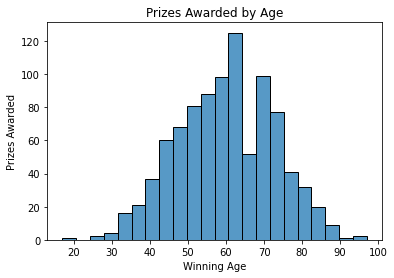

In [103]:
ax = sns.histplot(data=df_data, x='winning_age')
ax.set(xlabel='Winning Age',
       ylabel='Prizes Awarded',
       title='Prizes Awarded by Age')

[Text(0, 0.5, 'Prizes Awarded'),
 Text(0.5, 0, 'Winning Age'),
 Text(0.5, 1.0, 'Prizes Awarded by Age')]

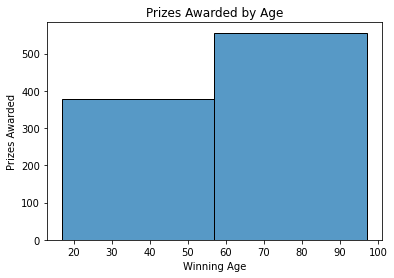

In [104]:
ax = sns.histplot(data=df_data, x='winning_age', bins=2)
ax.set(xlabel='Winning Age',
       ylabel='Prizes Awarded',
       title='Prizes Awarded by Age')

[Text(0, 0.5, 'Prizes Awarded'),
 Text(0.5, 0, 'Winning Age'),
 Text(0.5, 1.0, 'Prizes Awarded by Age')]

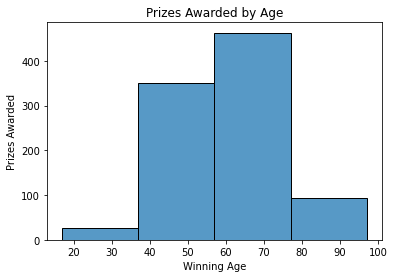

In [105]:
ax = sns.histplot(data=df_data, x='winning_age', bins=4)
ax.set(xlabel='Winning Age',
       ylabel='Prizes Awarded',
       title='Prizes Awarded by Age')

[Text(0, 0.5, 'Prizes Awarded'),
 Text(0.5, 0, 'Winning Age'),
 Text(0.5, 1.0, 'Prizes Awarded by Age')]

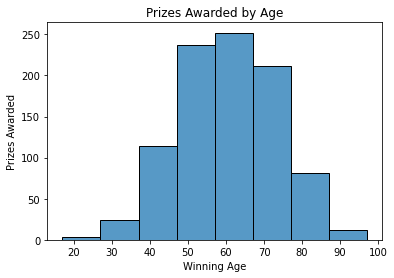

In [106]:
ax = sns.histplot(data=df_data, x='winning_age', bins=8)
ax.set(xlabel='Winning Age',
       ylabel='Prizes Awarded',
       title='Prizes Awarded by Age')

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [107]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

[Text(0, 0.5, 'Prizes Awarded'),
 Text(0.5, 0, 'Winning Age'),
 Text(0.5, 1.0, 'Distribution of Age on Receipt of Prize')]

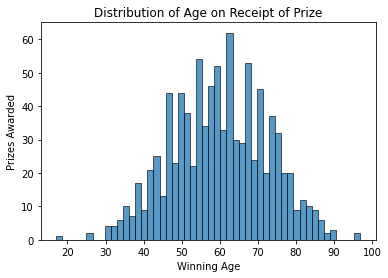

In [108]:
ax = sns.histplot(data=df_data, x='winning_age', bins=50)
ax.set(xlabel='Winning Age',
       ylabel='Prizes Awarded',
       title='Distribution of Age on Receipt of Prize')

[Text(0, 0.5, 'Prizes Awarded'),
 Text(0.5, 0, 'Winning Age'),
 Text(0.5, 1.0, 'Distribution of Age on Receipt of Prize')]

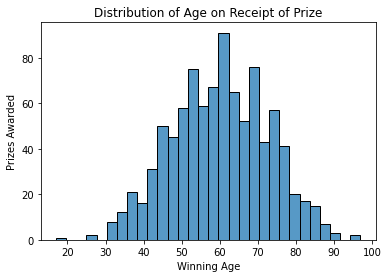

In [109]:
ax = sns.histplot(data=df_data, x='winning_age', bins=30)
ax.set(xlabel='Winning Age',
       ylabel='Prizes Awarded',
       title='Distribution of Age on Receipt of Prize')


[Text(0, 0.5, 'Prizes Awarded'),
 Text(0.5, 0, 'Winning Age'),
 Text(0.5, 1.0, 'Distribution of Age on Receipt of Prize')]

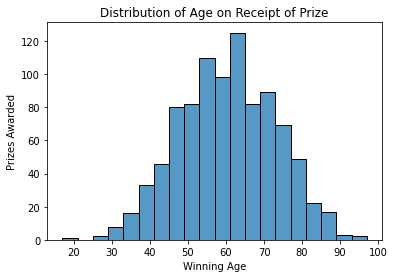

In [110]:
ax = sns.histplot(data=df_data, x='winning_age', bins=20)
ax.set(xlabel='Winning Age',
       ylabel='Prizes Awarded',
       title='Distribution of Age on Receipt of Prize')

[Text(0, 0.5, 'Prizes Awarded'),
 Text(0.5, 0, 'Winning Age'),
 Text(0.5, 1.0, 'Distribution of Age on Receipt of Prize')]

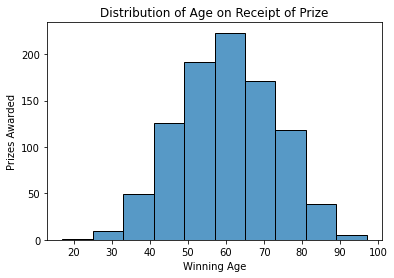

In [111]:
ax = sns.histplot(data=df_data, x='winning_age', bins=10)
ax.set(xlabel='Winning Age',
       ylabel='Prizes Awarded',
       title='Distribution of Age on Receipt of Prize')

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



[Text(0, 0.5, 'Winning Age'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Prizes Awarded by Age and Year')]

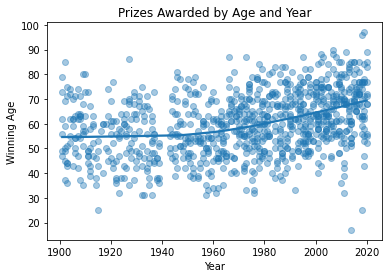

In [112]:
ax = sns.regplot(data=df_data, x='year', y='winning_age', lowess=True, scatter_kws = {'alpha': 0.4})
ax.set(ylabel='Winning Age',
       xlabel='Year',
       title='Prizes Awarded by Age and Year')

According to the best fit line, Nobel laureates were 55 years old on average between 1900 and 1940.  In 2020, the average age prediction is around 65 years old.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

[Text(0, 0.5, 'Nobel Prize Category'),
 Text(0.5, 0, 'Winning Age'),
 Text(0.5, 1.0, 'Nobel Prize Age Ranges by Prize Category')]

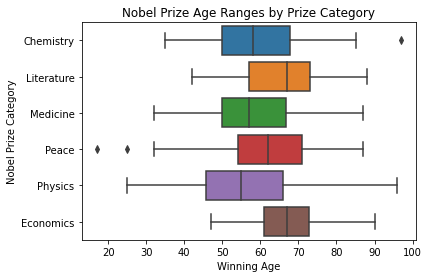

In [113]:
ax = sns.boxplot(data=df_data, x='winning_age', y='category')
ax.set(ylabel='Nobel Prize Category',
       xlabel='Winning Age',
       title='Nobel Prize Age Ranges by Prize Category')

The category with the longest whiskers is Phyics.
The Literature category has the most elderly winners on average.
The Physics category has the youngest winners on average.

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


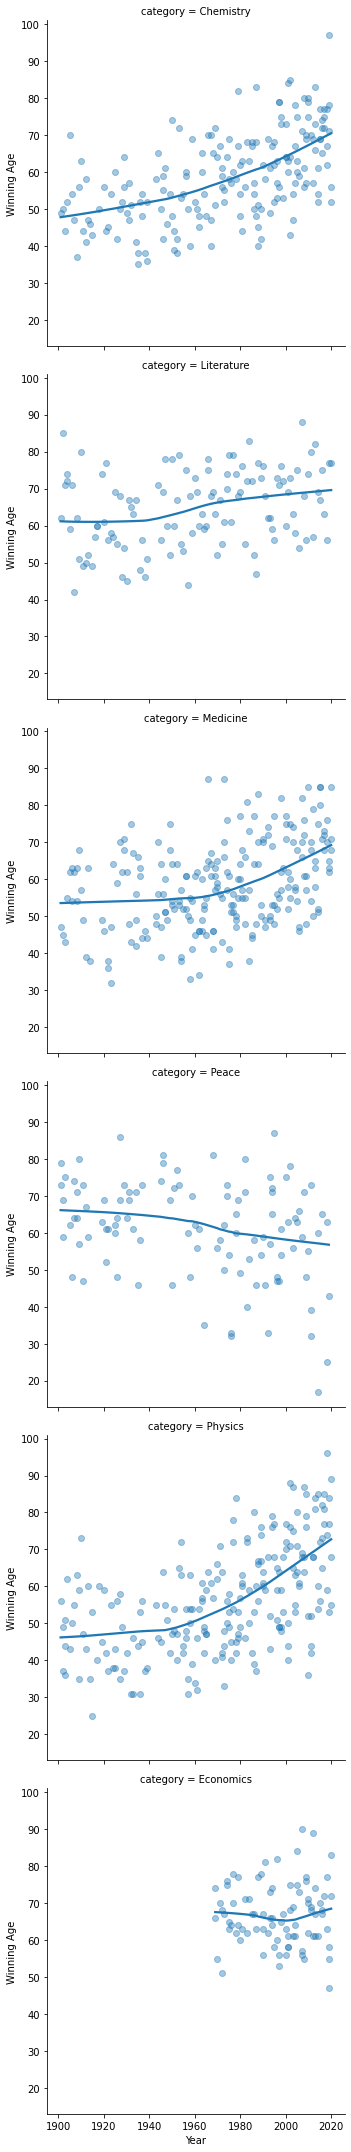

In [114]:
ax = sns.lmplot(x='year', y='winning_age', row='category', data=df_data, lowess=True, scatter_kws = {'alpha': 0.4})
ax.set(ylabel='Winning Age',
       xlabel='Year')

All categories with the exception of Peace show a general increase in age of winners.

The lmplots simply conveys slightly different information presented in the boxplot.  The boxplot shows the spread of ages for individual categories, while the lmplot show the age trend with time relative to the winner's age. 

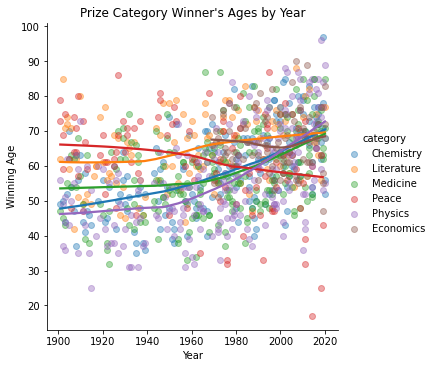

In [115]:
ax = sns.lmplot(x='year', y='winning_age', hue='category', data=df_data, lowess=True, scatter_kws = {'alpha': 0.4})
ax.set(ylabel='Winning Age',
       xlabel='Year',
       title="Prize Category Winner's Ages by Year")